# Cross-validation

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5)

array([ 0.97810219,  0.98529412,  0.98880597,  0.98501873,  0.9887218 ])

In [9]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=10)

array([ 0.97841727,  0.98550725,  0.99270073,  0.98529412,  0.98529412,
        1.        ,  0.97761194,  0.99236641,  1.        ,  0.97692308])

Grid Searches
=================

Grid-Search with build-in cross validation

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Define parameter grid:

In [11]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}
              

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])}


In [12]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

A GridSearchCV object behaves just like a normal classifier.

In [13]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ............. C=0.001, gamma=1e-05, score=0.109489, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............. C=0.001, gamma=1e-05, score=0.110294, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ............. C=0.001, gamma=1e-05, score=0.108209, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ............. C=0.001, gamma=1e-05, score=0.108614, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ............. C=0.001, gamma=1e-05, score=0.109023, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.109489, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.110294, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.108209, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.108614, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, score=0.941606, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.966912, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.955224, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.962547, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.969925, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.109489, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.110294, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ............... C=10.0, gamma=0.01, score=0.823970, total=   0.2s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] ............... C=10.0, gamma=0.01, score=0.770677, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.109489, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.110294, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.108209, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.108614, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.109023, total=   0.3s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   43.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [14]:
grid_search.predict(X_test)

array([6, 6, 5, 9, 2, 5, 5, 6, 1, 2, 6, 7, 6, 3, 6, 9, 0, 9, 3, 8, 8, 3, 3,
       2, 1, 6, 0, 1, 8, 3, 7, 4, 0, 6, 6, 3, 9, 7, 8, 1, 5, 9, 0, 7, 7, 5,
       9, 3, 9, 8, 3, 6, 3, 2, 5, 3, 3, 5, 1, 5, 2, 4, 9, 2, 0, 7, 4, 8, 5,
       2, 9, 8, 9, 2, 7, 9, 2, 2, 4, 7, 2, 8, 5, 5, 0, 6, 4, 0, 4, 2, 0, 7,
       7, 1, 0, 4, 1, 2, 4, 8, 9, 5, 2, 8, 4, 9, 3, 4, 4, 8, 9, 2, 1, 1, 2,
       2, 3, 5, 5, 4, 2, 4, 0, 8, 3, 9, 2, 0, 2, 5, 8, 7, 6, 8, 5, 7, 4, 5,
       9, 5, 5, 6, 2, 4, 2, 5, 6, 8, 6, 1, 6, 1, 8, 3, 0, 7, 3, 4, 2, 9, 0,
       6, 2, 9, 4, 6, 7, 2, 2, 5, 5, 3, 2, 6, 6, 4, 0, 7, 0, 5, 8, 6, 2, 3,
       6, 6, 6, 8, 9, 5, 6, 1, 3, 5, 7, 8, 5, 7, 3, 9, 1, 5, 9, 7, 5, 0, 4,
       8, 1, 3, 1, 2, 3, 9, 7, 4, 3, 3, 6, 7, 7, 1, 8, 7, 8, 6, 0, 6, 4, 5,
       0, 9, 6, 4, 6, 8, 7, 1, 8, 7, 0, 3, 8, 8, 2, 7, 9, 8, 7, 5, 0, 9, 3,
       0, 9, 4, 1, 2, 9, 0, 5, 1, 9, 8, 7, 7, 8, 6, 5, 7, 4, 3, 9, 7, 6, 7,
       5, 5, 6, 2, 3, 9, 4, 7, 5, 7, 1, 0, 5, 3, 8, 5, 7, 7, 0, 4, 0, 5, 1,
       1, 5,

In [15]:
grid_search.score(X_test, y_test)

0.99555555555555553

In [16]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.001}

<IPython.core.display.Javascript object>


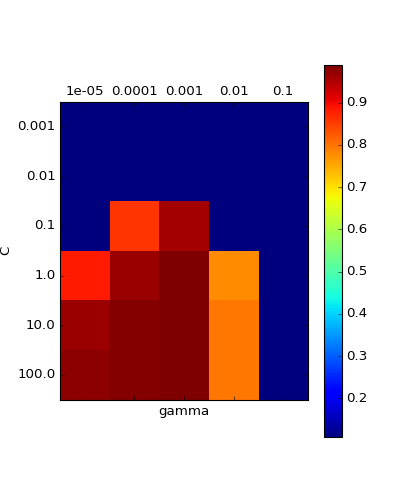

In [17]:
# We extract just the scores

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

# Exercises
Use GridSearchCV to adjust n_neighbors of KNeighborsClassifier.

In [18]:
param_grid = {'n_neighbors': np.arange(1, 10),
             'weights': ['uniform', 'distance']}

from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3, cv=5)
grid_search.fit(X_train, y=y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ... n_neighbors=1, weights=uniform, score=0.985401, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ... n_neighbors=1, weights=uniform, score=0.981618, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ... n_neighbors=1, weights=uniform, score=0.992537, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ... n_neighbors=1, weights=uniform, score=0.981273, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ... n_neighbors=1, weights=uniform, score=0.984962, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .. n_neighbors=1, weights=distance, score=0.985401, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .. n_neighbors=1, weights=distance, score=0.981618, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .. n_neighbors=1, weights=distance, score=0.992537, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .. n_neighbors=1, weights=distance, score=0.981273, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] .. n_neighbors=1, weights=distance, score=0.984962, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] .

[CV] ... n_neighbors=7, weights=uniform, score=0.988971, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ... n_neighbors=7, weights=uniform, score=0.988806, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ... n_neighbors=7, weights=uniform, score=0.981273, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ... n_neighbors=7, weights=uniform, score=0.977444, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .. n_neighbors=7, weights=distance, score=0.981752, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .. n_neighbors=7, weights=distance, score=0.992647, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .. n_neighbors=7, weights=distance, score=0.988806, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   15.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [19]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [20]:
grid_search.best_score_

0.98812175204157382

In [21]:
grid_search.score(X_train, y_train)

1.0

In [22]:
grid_search.score(X_test, y_test)

0.98666666666666669

<IPython.core.display.Javascript object>


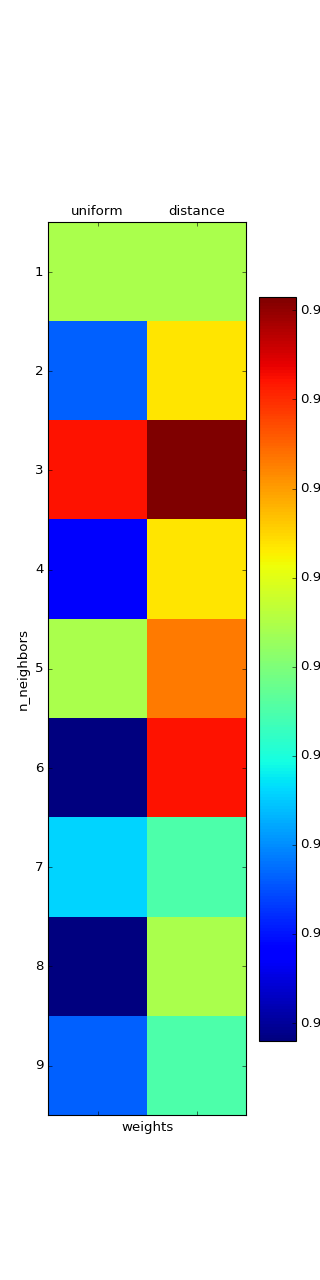

In [25]:
# For a single parameter (as in n_neighbors)
#scores = grid_search.cv_results_['mean_test_score']
#plt.figure()
#plt.plot(scores, 'p')

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['n_neighbors']), len(param_grid['weights']))
#plt.figure()
plt.matshow(scores)
plt.ylabel('n_neighbors')
plt.xlabel('weights')
plt.colorbar()
plt.yticks(np.arange(len(param_grid['n_neighbors'])), param_grid['n_neighbors'])
plt.xticks(np.arange(len(param_grid['weights'])), param_grid['weights']);

In [ ]:
# %load solutions/grid_search_k_neighbors.py